<a href="https://colab.research.google.com/github/kevinreal45/ML-Tasks/blob/main/122787_task_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt

Read the data

---




In [52]:
import pandas as pd

df = pd.read_csv('Nairobi Office Price Ex.csv')

print(df.head())

        LOC  FUR          AMB PROX_SCH PROX_ROAD PROX_MALL WATER HK_SER  \
0     karen  yes       serene       no       yes       yes   yes    yes   
1  madaraka  yes  semi_serene      yes       yes       yes    no     no   
2     karen   no        noisy       no       yes       yes   yes    yes   
3     karen  yes  semi_serene       no        no        no   yes    yes   
4  buruburu   no  semi_serene       no       yes       yes   yes    yes   

        SIZE      PRICE  
0  32.502345  31.707006  
1  53.426804  68.777596  
2  61.530358  62.562382  
3  47.475640  71.546632  
4  59.813208  87.230925  


In [53]:
df

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925
5,donholm,no,serene,no,no,yes,no,yes,55.142188,78.211518
6,langata,no,very_noisy,yes,yes,no,no,yes,52.211797,79.641973
7,langata,yes,serene,no,no,yes,yes,no,39.299567,59.171489
8,donholm,yes,semi_serene,yes,no,no,yes,no,48.105042,75.331242
9,karen,yes,serene,no,no,no,no,no,52.550014,71.300880


**Linear Regression Task summary**

1. Feature(x) -- office size
2. Target (y) -- office price

In [54]:
# Specify features (X) and target (y)
X = df[['SIZE']].values
y = df[['PRICE']].values

print(X)
print('\n')
print(y)

[[32.50234527]
 [53.42680403]
 [61.53035803]
 [47.47563963]
 [59.81320787]
 [55.14218841]
 [52.21179669]
 [39.29956669]
 [48.10504169]
 [52.55001444]
 [45.41973014]
 [54.35163488]
 [44.1640495 ]
 [58.16847072]]


[[31.70700585]
 [68.77759598]
 [62.5623823 ]
 [71.54663223]
 [87.23092513]
 [78.21151827]
 [79.64197305]
 [59.17148932]
 [75.3312423 ]
 [71.30087989]
 [55.16567715]
 [82.47884676]
 [62.00892325]
 [75.39287043]]


Mean Squared Error Function

In [55]:
def func_mse(y_true, y_pred):
  mse = np.mean(np.power(y_true - y_pred, 2))
  return mse


Gradient descent Function


In [56]:
def gradient_descent(X, y, m, c, learning_rate, epochs):
    n = len(y)
    for epoch in range(epochs):
        y_pred = m * X + c
        error = func_mse(y, y_pred)

        # Compute gradients
        dm = (-2 / n) * np.sum(X * (y - y_pred))
        dc = (-2 / n) * np.sum(y - y_pred)

        # Update weights
        m -= learning_rate * dm
        c -= learning_rate * dc

        # Print error for each epoch
        print(f"Epoch {epoch+1}: Mean Squared Error = {error}")

    return m, c

In [57]:
# Initialize parameters
m_initial = np.random.rand()  # Random
c_initial = np.random.rand()  # Random
learning_rate = 0.01
epochs = 10

In [58]:
# Train the model using gradient descent
m_final, c_final = gradient_descent(X, y, m_initial, c_initial, learning_rate, epochs)

Epoch 1: Mean Squared Error = 2209.6727511963513
Epoch 2: Mean Squared Error = 5515046.744118013
Epoch 3: Mean Squared Error = 14248101060.04703
Epoch 4: Mean Squared Error = 36810411985467.61
Epoch 5: Mean Squared Error = 9.510084410246485e+16
Epoch 6: Mean Squared Error = 2.4569598820546435e+20
Epoch 7: Mean Squared Error = 6.347632262361293e+23
Epoch 8: Mean Squared Error = 1.639930534985992e+27
Epoch 9: Mean Squared Error = 4.236811536052984e+30
Epoch 10: Mean Squared Error = 1.0945934360680088e+34


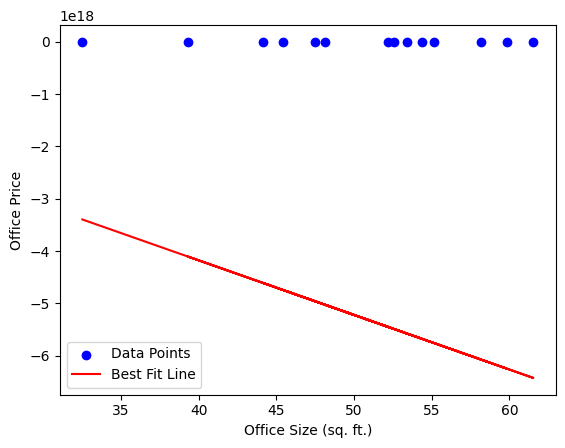

In [59]:
# Plot the data and the final line of best fit
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, m_final * X + c_final, color="red", label="Best Fit Line")
plt.xlabel("Office Size (sq. ft.)")
plt.ylabel("Office Price")
plt.legend()
plt.show()

In [60]:
# Predict office price for a size of 100 sq. ft.
size = 100
predicted_price = m_final * size + c_final
print(f"Predicted office price for 100 sq. ft. = {predicted_price}")

Predicted office price for 100 sq. ft. = -1.0446399499307934e+19
